# <b><center>OPTIMIZATION SOLDIERS PROBLEM</center></b>

Given five castles with a certain number of soldiers each, you want to get the largest army possible. However, there are rivalries between the kingdoms and if a castle is summoned, the rival castle will not join the army.

<img><center>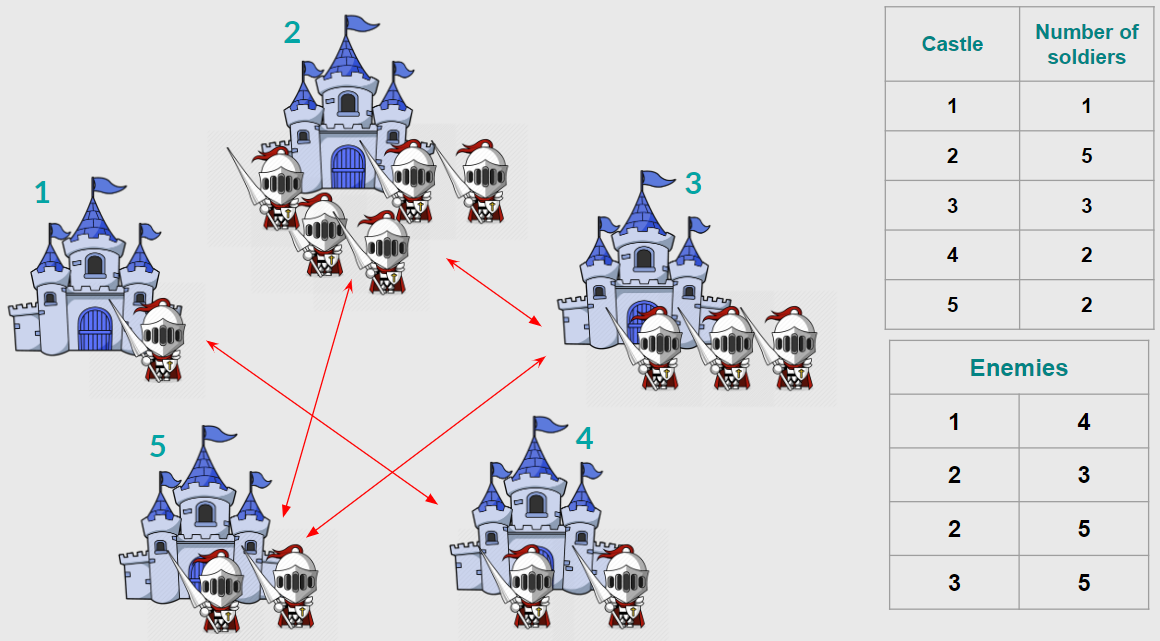</center>

To construct the cost function to be optimized would be: 

### <b><center>f(x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>) = number of soldiers</center></b>

Multiply each castle by its number of soldiers:

### <b><center>x<sub>0</sub> · 1 + x<sub>1</sub> · 5 + x<sub>2</sub> · 3 + x<sub>3</sub> · 2 + x<sub>4</sub> · 2</center></b>

On the other hand, we subtract the soldiers that would be lost due to enmities:

### <b><center>- x<sub>0</sub>·x<sub>3</sub>·(1 + 2) - x<sub>1</sub>·x<sub>2</sub>·(5 + 3) - x<sub>1</sub>·x<sub>4</sub>·(5 + 2) - x<sub>2</sub>·x<sub>4</sub>·(3 + 2)</center></b>

So, the QUBO function to optimize would be:

### <b><center>f(x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>) = x<sub>0</sub> + 5·x<sub>1</sub> + 3·x<sub>2</sub> + 2·x<sub>3</sub> + 2·x<sub>4</sub> - 3·x<sub>0</sub>·x<sub>3</sub> - 8·x<sub>1</sub>·x<sub>2</sub> - 7·x<sub>1</sub>·x<sub>4</sub> - 5·x<sub>2</sub>·x<sub>4</sub></center></b>

However, the problem we face is not a minimization problem, but a maximization problem by which we seek to obtain or recruit the largest possible army. Therefore, to convert this minimization problem into a maximization problem, we simply modify the original cube function to the one shown below: 

### <b><center>g(x) = - f(x) = - x<sub>0</sub> - 5·x<sub>1</sub> - 3·x<sub>2</sub> - 2·x<sub>3</sub> - 2·x<sub>4</sub> + 3·x<sub>0</sub>·x<sub>3</sub> + 8·x<sub>1</sub>·x<sub>2</sub> + 7·x<sub>1</sub>·x<sub>4</sub> + 5·x<sub>2</sub>·x<sub>4</sub></center></b>

# <b>Libraries

In [2]:
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
from dwave.system import DWaveSampler,EmbeddingComposite

# <b>Resolution of the problem under simulation

In [19]:
# We implement the function g(x), which is divided into its linear, quadratic and constant parts

linear = {0: -1, 1: -5, 2: -3, 3: -2, 4: -2} # Non-quadratic terms
quadratic = {(0, 3): 3, (1, 2): 8, (1, 4): 7, (2, 4): 5} # Quadratic terms
offset = 0.0 # Independent term
vartype = dimod.BINARY

In [21]:
# Construct the QUBO function g(x)

bqm = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype)

# Indicate the simulator

sampler = dimod.SimulatedAnnealingSampler()

# Exucute the problem in the simulator

sample_set = sampler.sample(bqm)

# Print the result (energy and state of energy)

solution = sample_set.first.sample
energy = sample_set.first.energy
print(f"The optimal solution is {solution} number of soldiers {abs(energy)}")

The optimal solution is {0: 0, 1: 1, 2: 0, 3: 1, 4: 0} number of soldiers 7.0


# <b>QPU solution

In [22]:
# Execute the problem in a QPU to compare the result between simulation and real execution and to check how the original graph is embedded in the D-Wave chimera topology.

num_samples = 1000
sampler = EmbeddingComposite(DWaveSampler())
bqm = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype) ##
sampleset = sampler.sample(bqm, num_reads=num_samples)   

# print the optimal results

solution = sampleset.first.sample
energy = sampleset.first.energy
print(f"The optimal solution is {solution} and the number of soldiers {abs(energy)}")

# The inspector functionality allows us to visualize how the network is embedded in the topology of the QPU

dwave.inspector.show(sampleset)    

The optimal solution is {0: 0, 1: 1, 2: 0, 3: 1, 4: 0} and the number of soldiers 7.0


Serving Inspector on http://127.0.0.1:18000/?problemId=cab4f3c8-e700-41dc-b739-576271aaabda

'http://127.0.0.1:18000/?problemId=cab4f3c8-e700-41dc-b739-576271aaabda'